In [12]:
# Team 1 LendingClub primary notebook
# import dependencies
import pandas as pd
import numpy as np # needed for replace nan code below
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# pull in all csvs and merge them into a single dataframe
bigdf = pd.concat([pd.read_csv(f, low_memory=False, usecols=['loan_amnt','term','int_rate','installment','emp_length','home_ownership','annual_inc','issue_d','loan_status','pymnt_plan','purpose','title','addr_state','dti','delinq_2yrs','mths_since_last_delinq','open_acc','pub_rec','total_rec_late_fee','recoveries','collection_recovery_fee','mths_since_last_major_derog','chargeoff_within_12_mths','delinq_amnt','mo_sin_old_il_acct','mo_sin_old_rev_tl_op','mo_sin_rcnt_rev_tl_op','mo_sin_rcnt_tl','mort_acc','mths_since_recent_bc','mths_since_recent_bc_dlq','mths_since_recent_inq','mths_since_recent_revol_delinq','pct_tl_nvr_dlq','pub_rec_bankruptcies','grade','tax_liens'
]) for f in
                    glob.glob('data/LoanStats*.csv')], ignore_index=True)

bigdf.dropna(subset=['term', 'issue_d'], inplace=True)

bigdf['mths_since_recent_bc']=bigdf['mths_since_recent_bc'].replace(np.nan, 0)
bigdf['mths_since_recent_bc_dlq']=bigdf['mths_since_recent_bc_dlq'].replace(np.nan, 0)
bigdf['mths_since_recent_inq']=bigdf['mths_since_recent_inq'].replace(np.nan, 0)
bigdf['emp_length']=bigdf['emp_length'].replace(np.nan, 0)
bigdf['mths_since_recent_revol_delinq']=bigdf['mths_since_recent_revol_delinq'].replace(np.nan, 0)

bigdf['int_rate'] = bigdf['int_rate'].str.replace("%","")
bigdf['int_rate'] = pd.to_numeric(bigdf['int_rate'], errors='coerce')

bigdf['loan_amnt'] = bigdf['loan_amnt'].div(1000000).round(2)


In [13]:
bigdf=bigdf[bigdf.emp_length!= '10+ years']
bigdf=bigdf[bigdf.emp_length!= 0]
bigdf['emp_length'] = bigdf['emp_length'].str.replace("years","")
bigdf['emp_length'] = bigdf['emp_length'].str.replace("year","")
bigdf['emp_length'] = bigdf['emp_length'].str.replace("<","")

bigdf['emp_length'] = pd.to_numeric(bigdf['emp_length'], errors='coerce')

In [14]:
bigdf['issue_d'] = np.where(bigdf['issue_d'] == "Jan-18", 1, bigdf['issue_d'])
bigdf['issue_d'] = np.where(bigdf['issue_d'] == "Feb-18", 2, bigdf['issue_d'])
bigdf['issue_d'] = np.where(bigdf['issue_d'] == "Mar-18", 3, bigdf['issue_d'])
bigdf['issue_d'] = np.where(bigdf['issue_d'] == "Apr-18", 4, bigdf['issue_d'])
bigdf['issue_d'] = np.where(bigdf['issue_d'] == "May-18", 5, bigdf['issue_d'])
bigdf['issue_d'] = np.where(bigdf['issue_d'] == "Jun-18", 6, bigdf['issue_d'])
bigdf['issue_d'] = np.where(bigdf['issue_d'] == "Jul-18", 7, bigdf['issue_d'])
bigdf['issue_d'] = np.where(bigdf['issue_d'] == "Aug-18", 8, bigdf['issue_d'])
bigdf['issue_d'] = np.where(bigdf['issue_d'] == "Sep-18", 9, bigdf['issue_d'])
bigdf['issue_d'] = np.where(bigdf['issue_d'] == "Oct-18", 10, bigdf['issue_d'])
bigdf['issue_d'] = np.where(bigdf['issue_d'] == "Nov-18", 11, bigdf['issue_d'])
bigdf['issue_d'] = np.where(bigdf['issue_d'] == "Dec-18", 12, bigdf['issue_d'])

bigdf['mths_since_recent_bc']=bigdf['mths_since_recent_bc'].replace(np.nan, 0)
bigdf['mths_since_recent_bc_dlq']=bigdf['mths_since_recent_bc_dlq'].replace(np.nan, 0)
bigdf['mths_since_recent_inq']=bigdf['mths_since_recent_inq'].replace(np.nan, 0)
bigdf['emp_length']=bigdf['emp_length'].replace(np.nan, 0)
bigdf['mths_since_recent_revol_delinq']=bigdf['mths_since_recent_revol_delinq'].replace(np.nan, 0)

bigdf.dropna(subset=['term', 'issue_d'], inplace=True)

TypeError: __init__() takes 1 positional argument but 2 were given

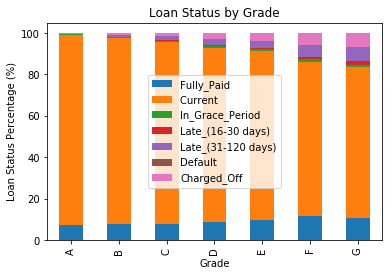

In [26]:
Percent_table=pd.crosstab(bigdf.grade, bigdf.loan_status, values=bigdf.loan_amnt, aggfunc='count').round(0)
Percent_table
Percent_table["Default"] = Percent_table["Default"].fillna(0)
Percent_table['Grand Total'] = Percent_table["Charged Off"] + Percent_table["Current"]+ Percent_table["Default"]+Percent_table["Fully Paid"]+Percent_table["In Grace Period"]+Percent_table["Late (16-30 days)"]+Percent_table["Late (31-120 days)"]
Percent_table["Charged_Off"] = Percent_table["Charged Off"]/Percent_table["Grand Total"]*100
Percent_table["Current "] = Percent_table["Current"]/Percent_table["Grand Total"]*100
Percent_table["Default "] = Percent_table["Default"]/Percent_table["Grand Total"]*100
Percent_table["Fully_Paid"] = Percent_table["Fully Paid"]/Percent_table["Grand Total"]*100
Percent_table["In_Grace_Period"] = Percent_table["In Grace Period"]/Percent_table["Grand Total"]*100
Percent_table["Late_(16-30 days)"] = Percent_table["Late (16-30 days)"]/Percent_table["Grand Total"]*100
Percent_table["Late_(31-120 days)"] = Percent_table["Late (31-120 days)"]/Percent_table["Grand Total"]*100
Percent_table

col = ["Fully_Paid","Current ","In_Grace_Period","Late_(16-30 days)","Late_(31-120 days)","Default ","Charged_Off"]
Percent_Final = Percent_table[col]


Percent_Final.plot(kind='bar',stacked=True)
plt.legend(loc="center")
plt.title("Loan Status by Grade")
plt.ylabel("Loan Status Percentage (%)")
plt.xlabel("Grade")




In [43]:
bigdf["quarter"] = ""
bigdf.loc[bigdf['issue_d'] == 12, ("quarter")] = ("Q4")
bigdf.loc[bigdf['issue_d'] == 11, ("quarter")] = ("Q4")
bigdf.loc[bigdf['issue_d'] == 10, ("quarter")] = ("Q4")
bigdf.loc[bigdf['issue_d'] == 9, ("quarter")] = ("Q3")
bigdf.loc[bigdf['issue_d'] == 8, ("quarter")] = ("Q3")
bigdf.loc[bigdf['issue_d'] == 7, ("quarter")] = ("Q3")
bigdf.loc[bigdf['issue_d'] == 6, ("quarter")] = ("Q2")
bigdf.loc[bigdf['issue_d'] == 5, ("quarter")] = ("Q2")
bigdf.loc[bigdf['issue_d'] == 4, ("quarter")] = ("Q2")
bigdf.loc[bigdf['issue_d'] == 3, ("quarter")] = ("Q1")
bigdf.loc[bigdf['issue_d'] == 2, ("quarter")] = ("Q1")
bigdf.loc[bigdf['issue_d'] == 1, ("quarter")] = ("Q1")
bigdf.head()



,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,issue_d,loan_status,...,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,pct_tl_nvr_dlq,pub_rec_bankruptcies,tax_liens,quarter
0,0.03,36 months,7.34,930.99,A,3,OWN,95000.0,3,Fully Paid,...,13.0,0.0,19.0,0.0,24.0,10.0,90.0,0.0,0.0,Q1
1,0.03,60 months,12.61,785.45,C,2,MORTGAGE,125000.0,3,Current,...,14.0,1.0,14.0,45.0,15.0,45.0,96.3,0.0,0.0,Q1
2,0.00,36 months,7.96,81.43,A,3,MORTGAGE,62000.0,3,Current,...,19.0,1.0,45.0,0.0,0.0,0.0,100.0,0.0,0.0,Q1
3,0.02,60 months,9.92,424.16,B,3,MORTGAGE,110000.0,3,Current,...,3.0,5.0,8.0,0.0,4.0,0.0,90.9,0.0,0.0,Q1
5,0.00,36 months,20.39,186.82,D,8,RENT,50000.0,3,Current,...,11.0,0.0,11.0,0.0,2.0,0.0,77.8,0.0,0.0,Q1


In [34]:
list(bigdf)

['loan_amnt',
 'term',
 'int_rate',
 'installment',
 'grade',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'purpose',
 'title',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'mths_since_last_delinq',
 'open_acc',
 'pub_rec',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'mths_since_last_major_derog',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'pct_tl_nvr_dlq',
 'pub_rec_bankruptcies',
 'tax_liens',
 'quarter']